In [35]:
import plotly.express as px
import pandas as pd
import numpy as np

import csa_data

SENTIMENT_CHAT_DATA_FILE = '../data/chat_sentiment_data.json'

In [36]:
chat_data = csa_data.get_json_data(SENTIMENT_CHAT_DATA_FILE)

chat_df = pd.DataFrame(chat_data['messages'])
chat_df['date'] = pd.to_datetime(chat_df['date'])

chat_df = chat_df.replace(0.0, np.nan)

chat_df.head()

,text,date,clean_text,sentiment
0,doge is going cray,2021-05-01 00:56:05,doge going cray,-0.530757
1,sell target of doge,2021-05-01 00:57:07,sell target doge,-0.519784
2,doge,2021-05-01 00:58:11,doge,0.500000
3,"anyway, is doge a good crypto for long term in...",2021-05-01 01:00:32,anyway doge good crypto long term investment,-0.562713
4,doge target 🎯,2021-05-01 01:03:16,doge target,0.511494


In [38]:
grouper = pd.Grouper(key='date', freq='1D')
stats_per_day = chat_df.groupby(grouper)['sentiment'].agg(['mean', 'count']).reset_index()

stats_per_day.rename(columns={'mean': 'avg. sentiment'}, inplace=True)

stats_per_day.head()

,date,avg. sentiment,count
0,2021-05-01,0.325934,34
1,2021-05-02,0.619031,6
2,2021-05-03,0.223162,21
3,2021-05-04,0.253793,70
4,2021-05-05,0.122195,47


# Chat Messages per Day

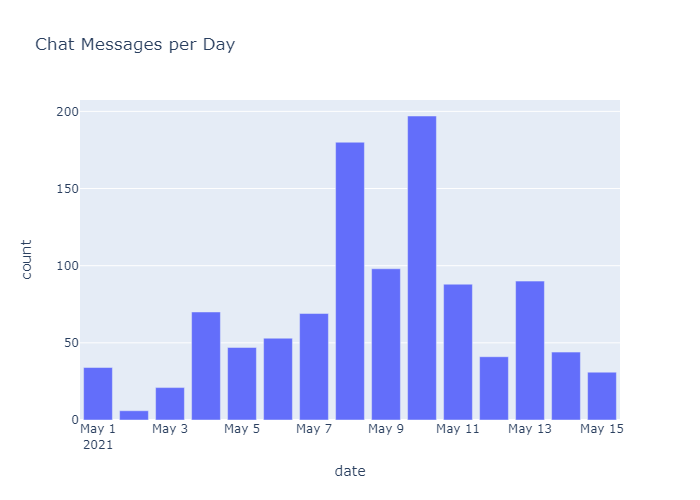

In [39]:
fig = px.bar(stats_per_day, x='date', y='count', title='Chat Messages per Day')
fig.show('png')

# Average sentiment per Day

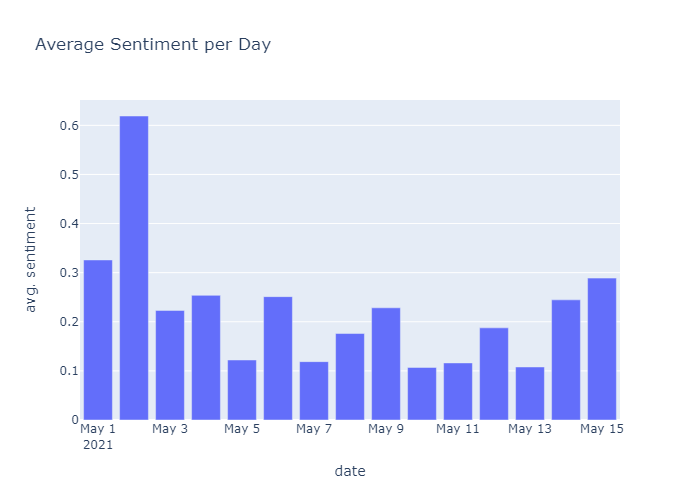

In [40]:
fig = px.bar(stats_per_day, x='date', y='avg. sentiment', title='Average Sentiment per Day')
fig.show('png')